# Car Accident Severity Analysis in Seattle 

# 1. Introduction/Business Problem

### 1-1. Background
 
When you driving to another city, you may come across a terrible traffic jam on the high way, it may be an car accident due to bad weather such as rainy and windy. 
Now, wouldn't it be great if there is something in place that could warn you, given the weather and the road conditions about the possibility of you getting into a 
car accident and how severe it would be, so that you would drive more carefully or even change your travel if you are able to. 

### 1-2. Business Problem
The business problem is to predict severity of an accident using relative varables such as weather and road condition, based on prediction score we can set up the warning system.  
If we could warn the severity level before driving the area to the people, people can paln to reduce or avoid to drive any high severity area.  

<i>End of Introduction and Business Problems

# 2. Data Understanding / Preparation

### 2-1. Data Source  

This data is provided in CSV format. 
Data is came from SDOT Traffic Management Division, Traffic Records Group. 
Provided data is collision data from all years by traffic records.
This includes all types of collisions. \
Collisions will display at the intersection or mid-block of a segment. Timeframe: 2004 to Present.


### 2-2. Data summary

Key attribute information  

|Attribute|Data type,length|Description|
|:------|:---|:---| 
|SEVERITYCODE    |    int64  | A code that corresponds to the severity of the collision:|
|                |           |    • 3—fatality|
|                |           |    • 2b—serious injury|
|                |           |    • 2—injury|
|                |           |    • 1—prop damage|
|                |           |    • 0—unknown|
|OBJECTID           | int64  | ESRI unique identifier |
|INCKEY             | int64  | A unique key for the incident |
|COLDETKEY          | int64  | Secondary key for the incident| 
|ADDRTYPE           | object | Collision address type:|
|                   |        |     • Alley|
|                   |        |     • Block|
|                   |        |     • Intersection|
|INTKEY             |float64 | A unique key for the incident |
|LOCATION           |object  | Description of the general location of the collision |
|SEVERITYDESC       |object  | A detailed description of the severity of the collision|
|PERSONCOUNT        |int64   | The total number of people involved in the collision |
|VEHCOUNT           |Double  | The number of vehicles involved in the collision, This is entered by the state. |


\
\



Data contains 38 columns and 194673 rows.\
check missing data and any adjusment. cleansing data catains 187525 rows. \
I will extract data and review its relationship and impact level of severity. \
Main extracted data with key columns such as SEVERITYCODE	ADDRTYPE	ROADCOND	LIGHTCOND	WEATHER supposed to impact severitycode.\
additionally PERSONCOUNT, VEHCOUNT will be added to dataset for split and test.\
\
review data distribution between severitycode and each attibutes. \
Addrtype shows different trend on severitycode, it may impact the severity. \
ROADCOND shows two attribute have impactful on severity.

### 2-3. Data read & review 

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
# CSV file tranfer 
!wget -o -- https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

In [77]:
# data review 
data = pd.read_csv('Data-Collisions.csv')
data.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [78]:
data.shape 
# Data contains 38 columns and 194673 rows.

(194673, 38)

In [79]:
data.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [80]:
data.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [81]:
data.dtypes
# key attribute to impact severity is mostly object such as ADDRTYPE, ROADCOND, LIGHTCOND, WEATHER.

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [82]:
# extract relative data
df=data.loc[:,['SEVERITYCODE','ADDRTYPE','ROADCOND','LIGHTCOND','WEATHER','PERSONCOUNT','VEHCOUNT']]
df.head()

,SEVERITYCODE,ADDRTYPE,ROADCOND,LIGHTCOND,WEATHER,PERSONCOUNT,VEHCOUNT
0,2,Intersection,Wet,Daylight,Overcast,2,2
1,1,Block,Wet,Dark - Street Lights On,Raining,2,2
2,1,Block,Dry,Daylight,Overcast,4,3
3,1,Block,Dry,Daylight,Clear,3,3
4,2,Intersection,Wet,Daylight,Raining,2,2


In [83]:
# Cleaning missing data 
# group by tables 
# check corelation of each items with severity code

In [84]:
df.dropna(axis=0, inplace=True)
df.head()

,SEVERITYCODE,ADDRTYPE,ROADCOND,LIGHTCOND,WEATHER,PERSONCOUNT,VEHCOUNT
0,2,Intersection,Wet,Daylight,Overcast,2,2
1,1,Block,Wet,Dark - Street Lights On,Raining,2,2
2,1,Block,Dry,Daylight,Overcast,4,3
3,1,Block,Dry,Daylight,Clear,3,3
4,2,Intersection,Wet,Daylight,Raining,2,2


In [85]:
df.shape

(187525, 7)

In [86]:
# check the total frame of extracted data
# df.groupby(['ADDRTYPE','ROADCOND','LIGHTCOND','WEATHER'])['SEVERITYCODE'].value_counts().to_frame()

In [87]:
# check the severity code group and the counts. 
df_sev = df.groupby(['SEVERITYCODE'], as_index=True).count()
df_sev

,ADDRTYPE,ROADCOND,LIGHTCOND,WEATHER,PERSONCOUNT,VEHCOUNT
SEVERITYCODE,,,,,,
1,130642,130642,130642,130642,130642,130642
2,56883,56883,56883,56883,56883,56883


In [88]:
# check the severity code with ADDRTYPE
#Add=df.groupby(['SEVERITYCODE'])['ADDRTYPE'].value_counts().to_frame()
#Add

In [89]:
# different type of table 
Add=df['SEVERITYCODE'].groupby([df['SEVERITYCODE'], df['ADDRTYPE']]).count()
Add.unstack()  # highly impact on the severity 

ADDRTYPE,Alley,Block,Intersection
SEVERITYCODE,,,
1,662,93892,36088
2,80,29429,27374


In [90]:
# check the severity code with ROADCOND
Road=df['SEVERITYCODE'].groupby([df['SEVERITYCODE'], df['ROADCOND']]).count()
Road.unstack()   # less impact, ICE, Snow severity drive damange than injuriy. 

ROADCOND,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet
SEVERITYCODE,,,,,,,,,
1,83835,923,40,82,51,827,82,13279,31523
2,39901,270,24,42,22,165,29,730,15700


In [91]:
# check the severity code with LIGHTCOND
Light=df['SEVERITYCODE'].groupby([df['SEVERITYCODE'], df['LIGHTCOND']]).count()
Light.unstack()   # less impact, dark no light more damange, Dawn, Daylight more injury 

LIGHTCOND,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown
SEVERITYCODE,,,,,,,,,
1,1192,869,33816,7,1668,76998,3907,175,12010
2,334,315,14420,4,823,38410,1936,52,589


In [92]:
# check the severity code with WEATHER
Wea=df['SEVERITYCODE'].groupby([df['SEVERITYCODE'], df['WEATHER']]).count()
Wea.unstack()    # Snowing drives more damange, others are similar 

WEATHER,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown
SEVERITYCODE,,,,,,,,,,,
1,36,74778,377,676,18836,2,21836,18,85,729,13269
2,13,35721,186,114,8715,3,11140,7,27,167,790


In [93]:
# check the severity code group and the counts.  
df_sev = df.groupby(['ADDRTYPE'], as_index=True).mean()
df_sev   # ADDRTYPE looks highly related to severity in terms of person and veh, intersection has high severity, more people, middle veh

,SEVERITYCODE,PERSONCOUNT,VEHCOUNT
ADDRTYPE,,,
Alley,1.107817,1.905660,1.683288
Block,1.238637,2.403776,2.008644
Intersection,1.431345,2.586020,1.899578


In [94]:
# check the severity code group and the counts. 
df_Road = df.groupby(['ROADCOND'], as_index=True).mean()
df_Road  # road condition doesn't show much correlation among severity, person, veh

,SEVERITYCODE,PERSONCOUNT,VEHCOUNT
ROADCOND,,,
Dry,1.322469,2.500517,1.978268
Ice,1.226320,2.214585,1.857502
Oil,1.375000,2.093750,1.718750
Other,1.338710,2.161290,1.766129
Sand/Mud/Dirt,1.301370,1.986301,1.630137
Snow/Slush,1.166331,2.406250,1.946573
Standing Water,1.261261,1.981982,1.639640
Unknown,1.052109,2.044400,1.976230
Wet,1.332465,2.501408,1.953773


In [95]:
# check the severity code group and the counts.  
df_Light = df.groupby(['LIGHTCOND'], as_index=True).mean()
df_Light   # Light doesn't show much correlation among severity, person, veh

,SEVERITYCODE,PERSONCOUNT,VEHCOUNT
LIGHTCOND,,,
Dark - No Street Lights,1.218873,2.217562,1.894495
Dark - Street Lights Off,1.266047,2.353041,1.923142
Dark - Street Lights On,1.298947,2.487022,1.937350
Dark - Unknown Lighting,1.363636,1.818182,1.454545
Dawn,1.330389,2.211160,1.892413
Daylight,1.332819,2.506655,1.986569
Dusk,1.331337,2.533117,1.967311
Other,1.229075,2.105727,1.885463
Unknown,1.046750,2.042622,1.981983


In [96]:
# check the severity code group and the counts.  
df_Wea = df.groupby(['WEATHER'], as_index=True).mean()
df_Wea   # Weather shows some items lookes pretty algined 

,SEVERITYCODE,PERSONCOUNT,VEHCOUNT
WEATHER,,,
Blowing Sand/Dirt,1.265306,2.285714,2.020408
Clear,1.323270,2.501253,1.977140
Fog/Smog/Smoke,1.330373,2.298401,1.896980
Other,1.144304,2.075949,1.954430
Overcast,1.316322,2.482487,1.966281
Partly Cloudy,1.600000,2.600000,2.000000
Raining,1.337821,2.514677,1.950722
Severe Crosswind,1.280000,2.200000,1.720000
Sleet/Hail/Freezing Rain,1.241071,2.410714,1.892857


In [97]:
# check the severity code group and the counts.  
df_Others = df.groupby(['SEVERITYCODE'], as_index=True).mean()
df_Others  # person is impacted to severity code. 

,PERSONCOUNT,VEHCOUNT
SEVERITYCODE,,
1,2.348311,2.000413
2,2.727986,1.901623


<i> End of Data Understanding

## 3. Data Pre Processing 

In [98]:
# change dependent variables into string type 
# I decided to use Decision Trees, the dependent variables 'SEVERITYCODE' should be in string type

df.SEVERITYCODE = df.SEVERITYCODE.astype(str) 

In [99]:
X = df[['ADDRTYPE','ROADCOND','LIGHTCOND','WEATHER','PERSONCOUNT','VEHCOUNT']].values
X[0:5]

array([['Intersection', 'Wet', 'Daylight', 'Overcast', 2, 2],
       ['Block', 'Wet', 'Dark - Street Lights On', 'Raining', 2, 2],
       ['Block', 'Dry', 'Daylight', 'Overcast', 4, 3],
       ['Block', 'Dry', 'Daylight', 'Clear', 3, 3],
       ['Intersection', 'Wet', 'Daylight', 'Raining', 2, 2]], dtype=object)

In [100]:
# from text value from each attribute covert to numeric value 

from sklearn import preprocessing

le_ADD = preprocessing.LabelEncoder()
le_ADD.fit(['Alley','Block','Intersection'])
X[:,0] = le_ADD.transform(X[:,0])

le_ROAD = preprocessing.LabelEncoder()
le_ROAD.fit([ 'Dry','Ice','Oil','Other','Sand/Mud/Dirt','Snow/Slush','Standing Water','Unknown','Wet'])
X[:,1] = le_ROAD.transform(X[:,1])

le_LIGHT = preprocessing.LabelEncoder()
le_LIGHT.fit([ 'Dark - No Street Lights', 'Dark - Street Lights Off','Dark - Street Lights On','Dark - Unknown Lighting','Dawn','Daylight','Dusk','Other','Unknown'])
X[:,2] = le_LIGHT.transform(X[:,2]) 

le_WEA = preprocessing.LabelEncoder()
le_WEA.fit([ 'Blowing Sand/Dirt','Clear','Fog/Smog/Smoke','Other','Overcast','Partly Cloudy','Raining','Severe Crosswind','Sleet/Hail/Freezing Rain','Snowing','Unknown'])
X[:,3] = le_WEA.transform(X[:,3]) 

In [101]:
X[0:5]

array([[2, 8, 5, 4, 2, 2],
       [1, 8, 2, 6, 2, 2],
       [1, 0, 5, 4, 4, 3],
       [1, 0, 5, 1, 3, 3],
       [2, 8, 5, 6, 2, 2]], dtype=object)

In [102]:
y = df["SEVERITYCODE"]
y[0:5]

0    2
1    1
2    1
3    1
4    2
Name: SEVERITYCODE, dtype: object

In [103]:
# the selection of attribute need to be reviewed and its consequences 
# scenario 1 : Mixture of 'ADDRTYPE','ROADCOND','LIGHTCOND','WEATHER' => No significant outcome, all potential possibility is severitycode 1, not well predicted
# scenario 2 : Mixture of single independent attribute => Beside 'ADDRTYIPE', other attributes have no significant impact on severity. 
# scenario 3 : Mixture of other attiribute 'JUNCTIONTYPE', 'Location' added to scenario 1, but not significant impact on severity. 
# scenario 4 : Mixture of numeric value 'PERSONCOUNT','VEHCOUNT' in scenario 1 => showing severity impact. although it is the the result of severity, need to see the consequence of other attribute.
# let's try scenario 4

## 4. Setting up the Model 

### 4-1. Set training model 

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
X_trainset, y_trainset.shape

# setting training model 

(array([[1, 0, 5, 1, 5, 2],
        [2, 0, 5, 1, 4, 3],
        [1, 0, 5, 1, 2, 2],
        ...,
        [1, 8, 2, 6, 2, 2],
        [1, 0, 5, 1, 2, 2],
        [1, 0, 5, 1, 2, 2]], dtype=object), (131267,))

In [105]:
X_testset, y_testset.shape

(array([[2, 8, 2, 6, 0, 2],
        [2, 0, 5, 4, 2, 2],
        [1, 0, 2, 4, 2, 2],
        ...,
        [1, 8, 2, 6, 4, 2],
        [1, 7, 8, 10, 2, 2],
        [1, 0, 2, 1, 1, 1]], dtype=object), (56258,))

### 4-2. Modeling : Decision Tree 

In [124]:
SeverityTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
SeverityTree

# compare to depth 4 and 5, 4 doen't much defind the condition of attribute, so I choose depth 5. 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [125]:
SeverityTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 4-3. Prediction

In [126]:
predTree = SeverityTree.predict(X_testset)

In [127]:
print (predTree [0:5])
print (y_testset [0:5])

['1' '1' '1' '1' '1']
164594    1
28396     1
48450     1
142897    1
85344     2
Name: SEVERITYCODE, dtype: object


### 4-4. Evaluation

In [128]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7419922499911124


In [129]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

print("DT Jaccard index: %.2f" % jaccard_similarity_score(y_testset, predTree))
print("DT F1-score: %.2f" % f1_score(y_testset, predTree, average='weighted') )

DT Jaccard index: 0.74
DT F1-score: 0.70


### 4-5. Visualization

In [130]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

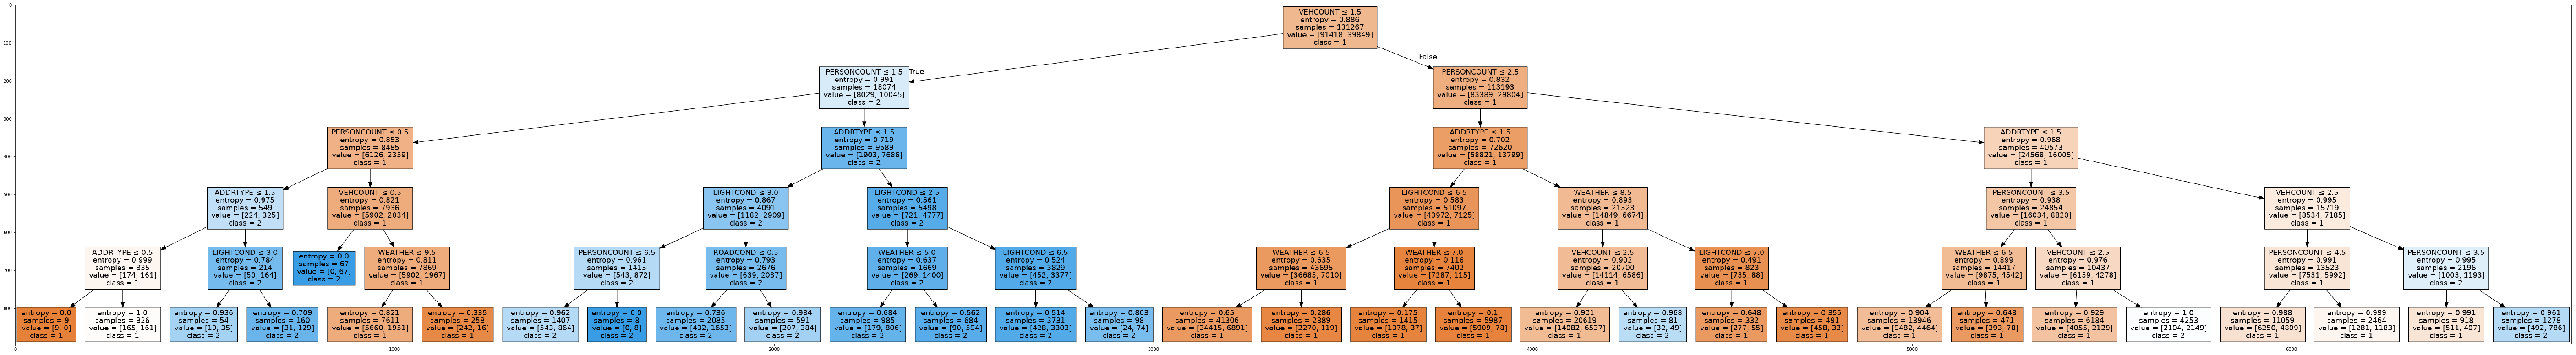

In [131]:
dot_data = StringIO()
filename = "severitytree.png"
featureNames = df.columns[1:7]
targetNames = df["SEVERITYCODE"].unique().tolist()
out=tree.export_graphviz(SeverityTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

## 5. Insight 

- Severity is decided mainly from the number of vehicles involved in the collision and The total number of people involved in the collision
- Impacted Number of peope, Number of Vehicle are depend on Addtype, Light and Weather. \
   For example, the situation in Alley or Block, in Dark time, under Smog or Cloudy weather are highly predicted severity 2. 
   
   
- Based on those two factors, we define the condition of 4 attribute, ADDRTYPE, LIGHTCOND, WEATHER, ROADCOND
- ADDRTYPE is highly related to severity level, Weather and Roadcondition have less impact 


<i>End of analysis 